In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def ElecUse(group, area):
    if group == 'a':
        beta0 = 3.
        beta1 = 2.
        sigma = 1.
    if group == 'b':
        beta0 = 2.
        beta1 = 4.
        sigma = 2. 
    return beta0 + beta1 * area/500000. + np.random.randn(area.shape[0]) * sigma

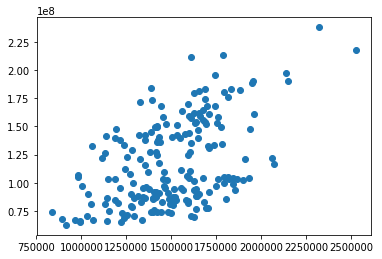

In [14]:
np.random.seed(2)
Area_A = ((np.random.randn(100)) * 500000 + 3000000)/2. # sqft
Area_B = ((np.random.randn(100)) * 500000 + 3000000)/2. # sqft
Elec_A = ElecUse('a',Area_A)*10000000 # kBTU
Elec_B = ElecUse('b',Area_B)*10000000 # kBTU

Area = np.hstack((Area_A,Area_B))
Elec = np.hstack((Elec_A,Elec_B))

DF = pd.DataFrame({'Area [sq ft]':Area, 'Elec [kBTU]':Elec})
DF.to_excel('Data.xlsx')

plt.scatter(DF['Area [sq ft]'], DF['Elec [kBTU]'])

In [15]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(Area[:,None]/500000., Elec[:,None]/10000000.)
# print LR.score(Area[:,None], Elec[:,None])
print LR.coef_, LR.intercept_
print LR.score(Area[:,None]/500000., Elec[:,None]/10000000.)

[[3.49582269]] [1.21288991]
0.24816505653355336
